# Part B 

## Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/imand/Desktop/Achia/year3 sem1/TextAnalysis/train.csv/train.csv",header=None)
df.columns = ['Rating', 'Title', 'Review']
df.head(10)

,Rating,Title,Review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
5,2,an absolute masterpiece,I am quite sure any of you actually taking the...
6,1,Buyer beware,"This is a self-published book, and if you want..."
7,2,Glorious story,I loved Whisper of the wicked saints. The stor...
8,2,A FIVE STAR BOOK,I just finished reading Whisper of the Wicked ...
9,2,Whispers of the Wicked Saints,This was a easy to read book that made me want...


In [2]:
df.shape

(3600000, 3)

## Check Missing Value

In [3]:
df.isnull().sum()

Rating      0
Title     207
Review      0
dtype: int64

In [6]:
#Remove Missing Value
df = df.dropna()
df.shape


(3599793, 3)

In [7]:
df.isnull().sum()

Rating    0
Title     0
Review    0
dtype: int64

In [18]:
df.duplicated().sum()


np.int64(0)

## Set labels to 0 and 1

In [19]:
def decrease_label_by_one(label):
    return label - 1

df['Rating'] = df['Rating'].apply(decrease_label_by_one)

## Count ratings

In [20]:
df.Rating.value_counts(normalize = True)


Rating
1    0.500005
0    0.499995
Name: proportion, dtype: float64

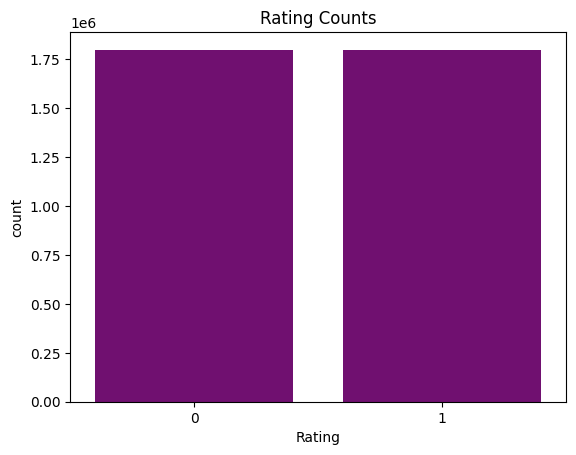

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

color_palette = ['purple', 'cyan']
sns.set_palette(color_palette) 
sns.countplot(x=df['Rating'])

plt.title('Rating Counts')
plt.show()

## Text Preprocessing

In [26]:
import re
import contractions
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")


def preprocess_text(text):
    # Text clean
    text = re.sub(r'[\W_]+', ' ', contractions.fix(re.sub(r'\d+', '', text.replace(' s ', ' ')))).lower()

    # Stopword removal
    tokens = nltk.word_tokenize(text)
    text = " ".join([token for token in tokens if token not in stop_words])

    # Data Normalization
    normalized_text = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(normalized_text)

    return text

In [28]:
from termcolor import colored
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")


print(colored('Before of clean (Title):\n', 'blue'), df.Title[8])
print(colored('After of clean (Title):\n', 'blue'), preprocess_text(df.Title[8]))
print(colored('Before of clean (Review):\n', 'blue'), df.Review[8])
print(colored('After of clean (Review):\n', 'blue'), preprocess_text(df.Review[8]))

Before of clean (Title):
 A FIVE STAR BOOK
After of clean (Title):
 five star book
Before of clean (Review):
 I just finished reading Whisper of the Wicked saints. I fell in love with the caracters. I expected an average romance read, but instead I found one of my favorite books of all time. Just when I thought I could predict the outcome I was shocked ! The writting was so descriptive that my heart broke when Julia's did and I felt as if I was there with them instead of just a distant reader. If you are a lover of romance novels then this is a must read. Don't let the cover fool you this book is spectacular!
After of clean (Review):
 finish read whisper wick saint fell love caract expect averag romanc read instead found one favorit book time thought could predict outcom shock writ descript heart broke julia felt instead distant reader lover romanc novel must read let cover fool book spectacular


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Cleaning and processing on the Review variable


In [30]:
import swifter

df['Title'] = df['Title'].swifter.apply(preprocess_text)
df['Review'] = df['Review'].swifter.apply(preprocess_text)
df.head(10)

Pandas Apply: 100%|██████████| 3599793/3599793 [37:03<00:00, 1618.81it/s]


,Rating,Title,Review
0,1,stune even non gamer,sound track beauti paint seneri mind well woul...
1,1,best soundtrack ever anyth,read lot review say best game soundtrack figur...
2,1,amaz,soundtrack favorit music time hand intens sad ...
3,1,excel soundtrack,truli like soundtrack enjoy video game music p...
4,1,rememb pull jaw floor hear,play game know divin music everi singl song te...
5,1,absolut masterpiec,quit sure actual take time read play game leas...
6,0,buyer bewar,self publish book want know read paragraph sta...
7,1,glorious stori,love whisper wick saint stori amaz pleasant su...
8,1,five star book,finish read whisper wick saint fell love carac...
9,1,whisper wick saint,easi read book made want keep read easi put le...


## Save File into new csv

In [31]:
df.to_csv("clean_train.csv", index=False)


## Frequency Words

In [38]:
from collections import Counter

words = Counter(' '.join(df['Review'].to_list()).split())
Frequency_words_Review = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words_Review = Frequency_words_Review.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words_Review['Rank'] = Frequency_words_Review['Rank'].apply(lambda x : x+1)
Frequency_words_Review.head(20)

,Rank,Words,Frequency
0,1,book,2067641
1,2,one,1368652
2,3,like,1124334
3,4,would,1017583
4,5,read,896350
5,6,use,867683
6,7,get,855201
7,8,good,851290
8,9,great,815091
9,10,time,814653


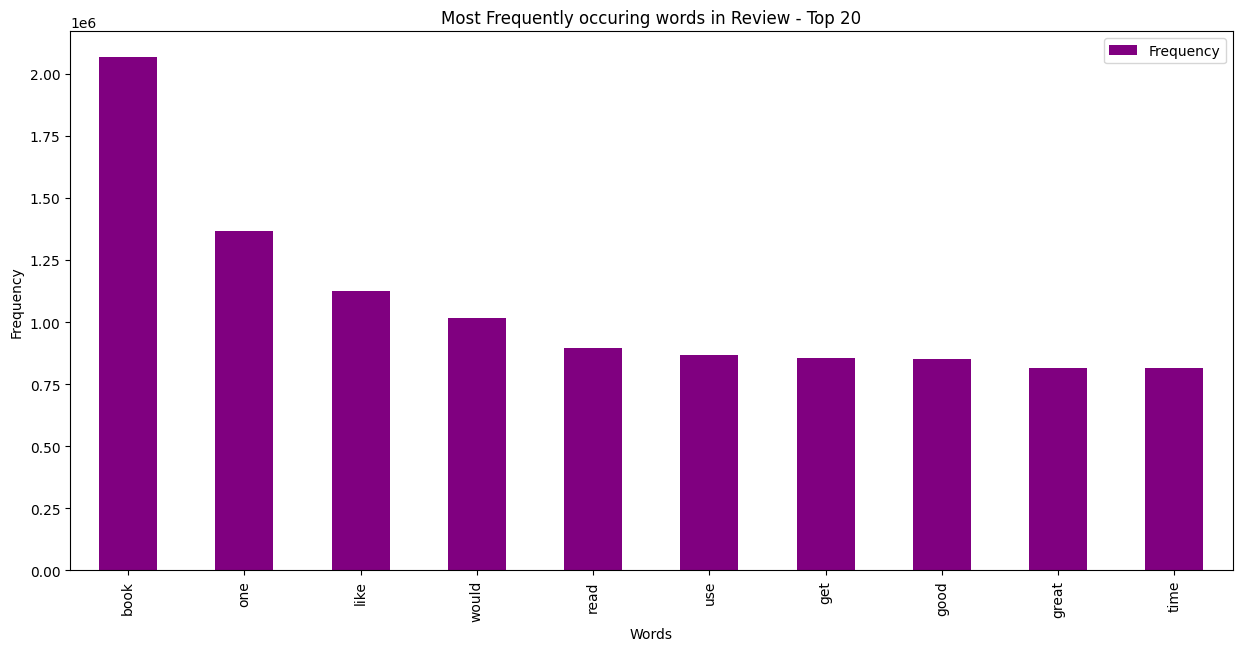

In [39]:
Top10 = Frequency_words_Review[['Words','Frequency']].head(10)
Top10.plot(x="Words", y="Frequency", kind='bar',  figsize=(15,7), color = 'purple')
plt.title("Most Frequently occuring words in Review - Top 20")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

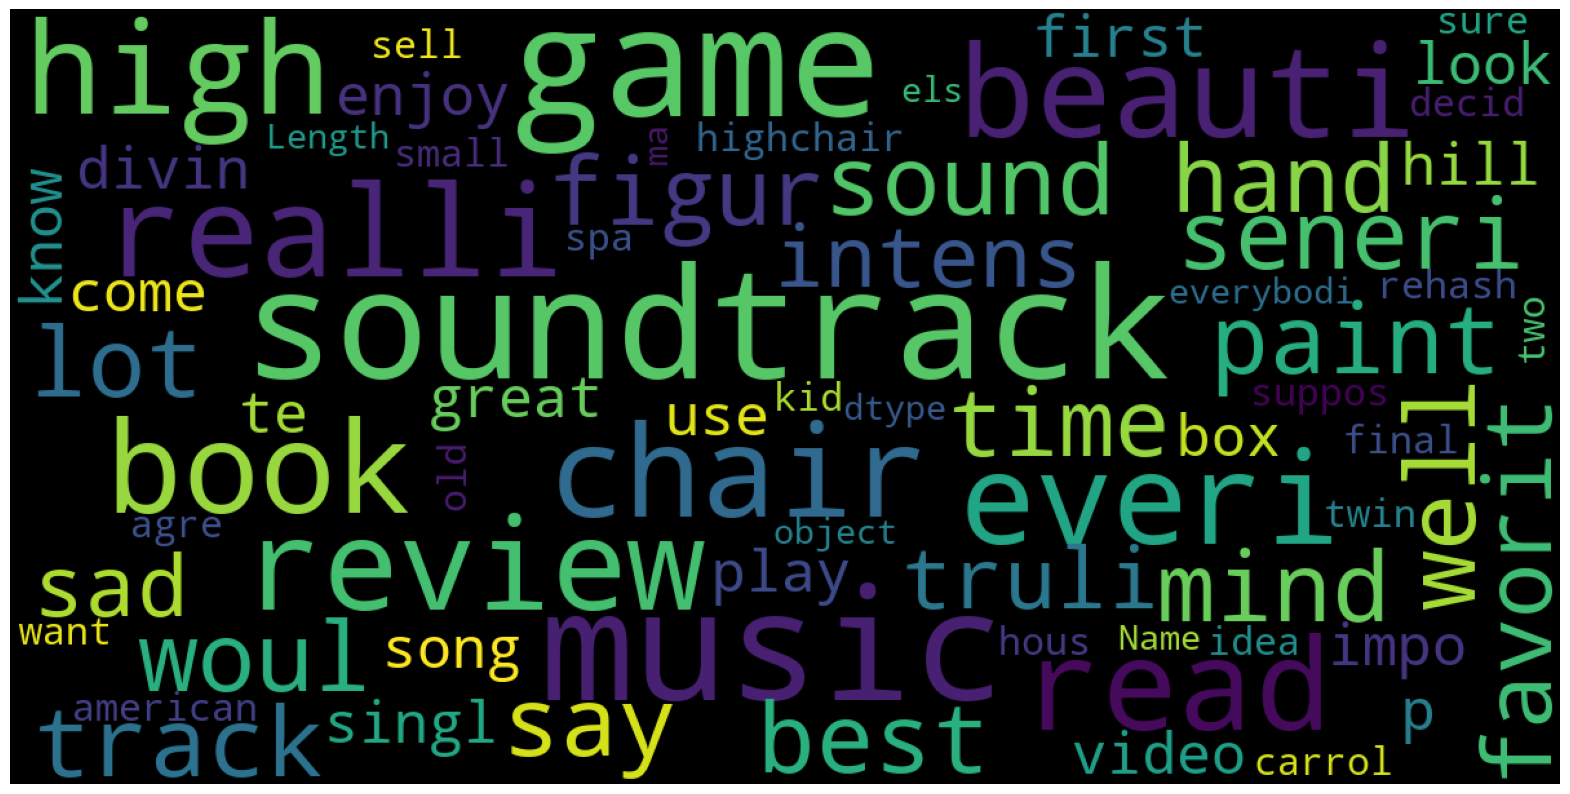

In [40]:
from wordcloud import WordCloud
#  WordCloud chart 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 350,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["Review"])

In [44]:
from collections import Counter

words = Counter(' '.join(df['Title'].to_list()).split())
Frequency_words_Title = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words_Title = Frequency_words_Title.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words_Title['Rank'] = Frequency_words_Title['Rank'].apply(lambda x : x+1)
Frequency_words_Title.head(20)

,Rank,Words,Frequency
0,1,great,276003
1,2,good,200516
2,3,book,183686
3,4,best,96086
4,5,work,91497
5,6,love,79233
6,7,read,76166
7,8,one,75096
8,9,disappoint,74770
9,10,movi,68194


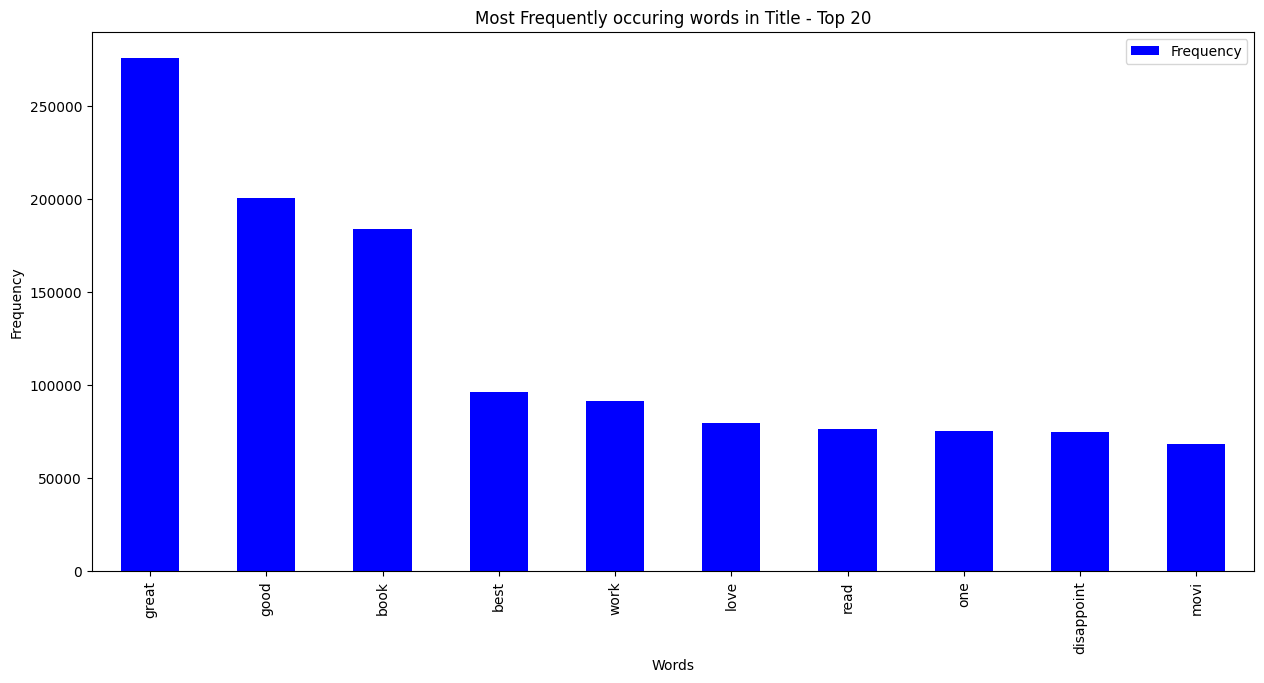

In [45]:
Top10 = Frequency_words_Title[['Words','Frequency']].head(10)
Top10.plot(x="Words", y="Frequency", kind='bar',  figsize=(15,7), color = 'blue')
plt.title("Most Frequently occuring words in Title - Top 20")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

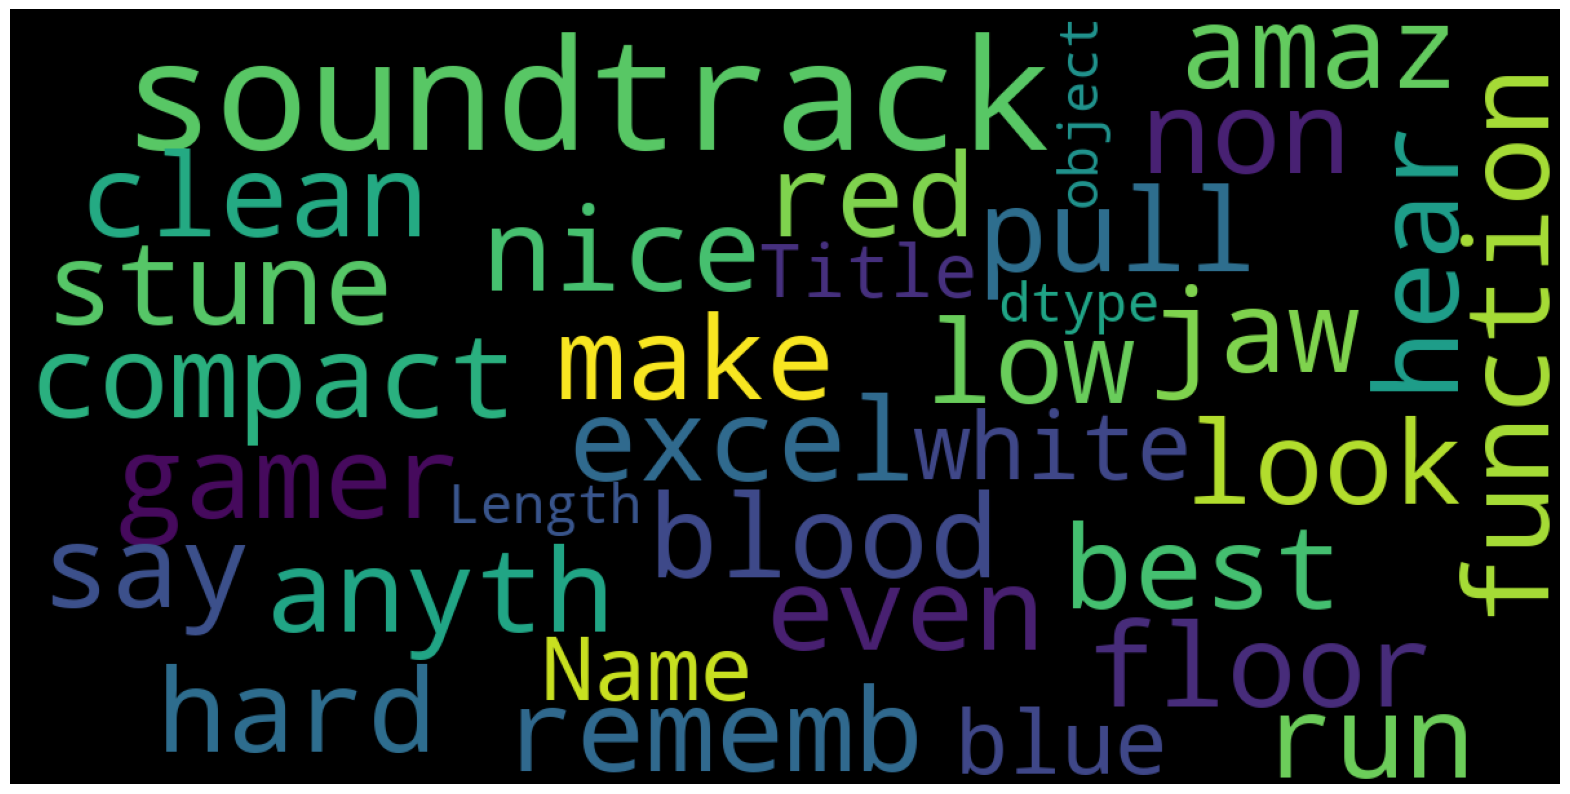

In [46]:
from wordcloud import WordCloud
#  WordCloud chart 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 350,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["Title"])